In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pytesseract

In [3]:
!pip install opencv-python

In [4]:
import pytesseract

In [5]:
!ls

drive  sample_data


In [6]:
%cd '/content/drive/MyDrive/imagesforcomparison'

/content/drive/MyDrive/imagesforcomparison


In [7]:
!ls

ground_truth.txt  img  TessercatOCR.ipynb  TessercatOcrVSeasyOcr.ipynb


In [8]:
# Loading the required python modules
import pytesseract # this is tesseract module
import matplotlib.pyplot as plt
import cv2 # this is opencv module
import glob
import os

In [9]:
# specify path to the license plate images folder as shown below
# Construct the path for license plates
path_for_license_plates =  os.path.join(os.getcwd()+"/content/drive/MyDrive/imagesforcomparison/img/**/*.jpg")

# Fetch all image paths matching the pattern
image_paths = glob.glob(path_for_license_plates, recursive=True)

# Print all found image paths to verify
for image_path in image_paths:
    print(image_path)
list_license_plates = []
predicted_license_plates = []

for path_to_license_plate in glob.glob(path_for_license_plates, recursive = True):

    license_plate_file = path_to_license_plate.split("/")[-1]
    license_plate, _ = os.path.splitext(license_plate_file)
    list_license_plates.append(license_plate)

    '''
    Read each license plate image file using openCV
    '''
    img = cv2.imread(path_to_license_plate)

    '''
    We then pass each license plate image file
    to the Tesseract OCR engine using the Python library
    wrapper for it. We get back predicted_result for
    license plate. We append the predicted_result in a
    list and compare it with the original the license plate
    '''
    predicted_result = pytesseract.image_to_string(img, lang ='eng',
    config ='--oem 3 --psm 6 -c tessedit_char_whitelist = ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

    filter_predicted_result = "".join(predicted_result.split()).replace(":", "").replace("-", "")
    predicted_license_plates.append(filter_predicted_result)



In [10]:
print("Actual License Plate", "\t", "Predicted License Plate", "\t", "Accuracy")
print("--------------------", "\t", "-----------------------", "\t", "--------")

def calculate_predicted_accuracy(actual_list, predicted_list):
    for actual_plate, predict_plate in zip(actual_list, predicted_list):
        accuracy = "0 %"
        num_matches = 0
        if actual_plate == predict_plate:
            accuracy = "100 %"
        else:
            if len(actual_plate) == len(predict_plate):
                for a, p in zip(actual_plate, predict_plate):
                    if a == p:
                        num_matches += 1
                accuracy = str(round((num_matches / len(actual_plate)), 2) * 100)
                accuracy += "%"
        print("     ", actual_plate, "\t\t\t", predict_plate, "\t\t  ", accuracy)


calculate_predicted_accuracy(list_license_plates, predicted_license_plates)


Actual License Plate 	 Predicted License Plate 	 Accuracy
-------------------- 	 ----------------------- 	 --------


In [11]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 29.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [12]:
!apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (28.4 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [13]:
!pip install pytesseract


In [14]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'


In [19]:

import cv2
import pytesseract
import easyocr
import numpy as np
import os
import time
from google.colab.patches import cv2_imshow

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define the path to the directory containing the images and ground truth labels
image_dir = '/content/drive/MyDrive/imagesforcomparison/img'
ground_truth_file = '/content/drive/MyDrive/imagesforcomparison/ground_truth.txt'

# Read ground truth labels
try:
    with open(ground_truth_file, 'r') as f:
        ground_truth = {}
        for line in f.readlines():
            parts = line.split(maxsplit=1)
            if len(parts) == 2:
                ground_truth[parts[0].lower()] = parts[1].strip()
            else:
                print(f"Skipping incorrectly formatted line: {line}")
    print("Ground truth labels loaded successfully:", ground_truth)
except Exception as e:
    print(f"Error reading ground truth file: {e}")
    exit()

# Function to preprocess images
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)
    return gray

def post_process_text(text):
    text = text.replace('G', '0')  # Replace 'O' with '0'
    text = text.replace('I', '1')  # Replace 'I' with '1'
    text = text.replace('S', '5')  # Replace 'S' with '5'
    text = ''.join([c for c in text if c.isalnum()])  # Remove non-alphanumeric characters
    return text



# Function to calculate accuracy
def calculate_accuracy(results, ground_truth):
    correct = 0
    for filename, ocr_result in results.items():
        if filename.lower() in ground_truth and ocr_result.strip().upper() == ground_truth[filename.lower()].upper():
            correct += 1
    return correct / len(ground_truth) * 100

# Lists to store OCR results and processing times
tesseract_results = {}
easyocr_results = {}
tesseract_times = []
easyocr_times = []

# Process each image using both OCR tools
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

if not image_files:
    print("No images found in the specified directory.")
    exit()

for filename in image_files:
    try:
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error reading image: {filename}")
            continue

        preprocessed_image = preprocess_image(image)
        print(f"Preprocessed image for {filename}")
        cv2_imshow(preprocessed_image)

        # Tesseract OCR
        start_time = time.time()
        tesseract_text = pytesseract.image_to_string(preprocessed_image, config='--psm 6').strip()
        tesseract_times.append(time.time() - start_time)
        tesseract_results[filename] = tesseract_text
        print(f"Tesseract OCR result for {filename}: {tesseract_text}")

        # EasyOCR
        start_time = time.time()
        easyocr_result = reader.readtext(preprocessed_image)
        easyocr_text = ' '.join([res[1] for res in easyocr_result]).strip()
        easyocr_times.append(time.time() - start_time)
        easyocr_results[filename] = easyocr_text
        print(f"EasyOCR result for {filename}: {easyocr_text}")

    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Calculate accuracies
tesseract_accuracy = calculate_accuracy(tesseract_results, ground_truth)
easyocr_accuracy = calculate_accuracy(easyocr_results, ground_truth)

# Calculate average times
tesseract_avg_time = sum(tesseract_times) / len(tesseract_times) if tesseract_times else 0
easyocr_avg_time = sum(easyocr_times) / len(easyocr_times) if easyocr_times else 0

# Print results
print(f"Tesseract OCR - Accuracy: {tesseract_accuracy:.2f}%, Average Time: {tesseract_avg_time:.4f} seconds")
print(f"EasyOCR - Accuracy: {easyocr_accuracy:.2f}%, Average Time: {easyocr_avg_time:.4f} seconds")


Output hidden; open in https://colab.research.google.com to view.

Ground truth labels loaded successfully.
License plate not found for BAA4679.JPG
License plate not found for BAA4653.JPG
License plate not found for BAA4654.JPG
Preprocessed image for BAA4655.JPG


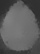

Tesseract OCR result for BAA4655.JPG: a
-
EasyOCR result for BAA4655.JPG: 
Preprocessed image for BAA2164.JPG


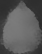

Tesseract OCR result for BAA2164.JPG: 7
EasyOCR result for BAA2164.JPG: 
Preprocessed image for BAA2752.JPG


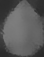

Tesseract OCR result for BAA2752.JPG: a
ie
EasyOCR result for BAA2752.JPG: 
License plate not found for BAA4662.JPG
License plate not found for BAA4651.JPG
License plate not found for BAA2775.JPG
License plate not found for BAA2755.JPG
License plate not found for BAA2682.JPG
Preprocessed image for BAA3988.JPG


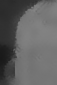

Tesseract OCR result for BAA3988.JPG: [
EasyOCR result for BAA3988.JPG: 
Preprocessed image for BAA3532.JPG


Tesseract OCR result for BAA3532.JPG: 
EasyOCR result for BAA3532.JPG: 
Preprocessed image for BAA3915.JPG


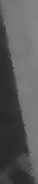

Tesseract OCR result for BAA3915.JPG: 
EasyOCR result for BAA3915.JPG: 
Preprocessed image for BAA3453.JPG


Tesseract OCR result for BAA3453.JPG: _—
EasyOCR result for BAA3453.JPG: 
License plate not found for BAA3222.JPG
Preprocessed image for BAB2135.JPG


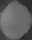

Tesseract OCR result for BAB2135.JPG: y=
a
EasyOCR result for BAB2135.JPG: 
Preprocessed image for BAB2168.JPG


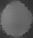

Tesseract OCR result for BAB2168.JPG: ,
=
EasyOCR result for BAB2168.JPG: 
Preprocessed image for BAB2127.JPG


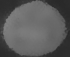

Tesseract OCR result for BAB2127.JPG: q
EasyOCR result for BAB2127.JPG: 
Preprocessed image for BAB2140.JPG


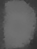

Tesseract OCR result for BAB2140.JPG: Fs
EasyOCR result for BAB2140.JPG: 
Preprocessed image for BAB2131.JPG


Tesseract OCR result for BAB2131.JPG: |
EasyOCR result for BAB2131.JPG: 
Preprocessed image for BAB2130.JPG


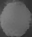

Tesseract OCR result for BAB2130.JPG: a
EasyOCR result for BAB2130.JPG: 
Preprocessed image for BAB2150.JPG


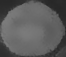

Tesseract OCR result for BAB2150.JPG: a
EasyOCR result for BAB2150.JPG: 
Preprocessed image for BAB2126.JPG


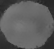

Tesseract OCR result for BAB2126.JPG: | ga
he a
EasyOCR result for BAB2126.JPG: 
Preprocessed image for BAB1899.JPG


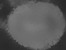

Tesseract OCR result for BAB1899.JPG: €
EasyOCR result for BAB1899.JPG: 
Preprocessed image for BAB1897.JPG


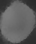

Tesseract OCR result for BAB1897.JPG: ,
Ce
EasyOCR result for BAB1897.JPG: 
Preprocessed image for BAB1884.JPG


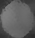

Tesseract OCR result for BAB1884.JPG: a
EasyOCR result for BAB1884.JPG: 
Preprocessed image for BAB1883.JPG


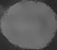

Tesseract OCR result for BAB1883.JPG: a:
a
EasyOCR result for BAB1883.JPG: 
License plate not found for BAB2133.JPG
Preprocessed image for BAB1876.JPG


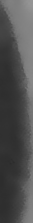

Tesseract OCR result for BAB1876.JPG: |
EasyOCR result for BAB1876.JPG: 
License plate not found for BAB1881.JPG
Preprocessed image for BAB1898.JPG


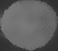

Tesseract OCR result for BAB1898.JPG: a
EasyOCR result for BAB1898.JPG: 
License plate not found for BAA5152.JPG
Preprocessed image for BAA6362.JPG


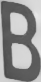

Tesseract OCR result for BAA6362.JPG: 
EasyOCR result for BAA6362.JPG: 8
License plate not found for BAA6364.JPG
Preprocessed image for BAA6542.jpg


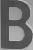

Tesseract OCR result for BAA6542.jpg: R
EasyOCR result for BAA6542.jpg: B
License plate not found for BAC1640.jpg
License plate not found for FAA1312.jpg
License plate not found for BAC1630.jpg
License plate not found for BAC1627.jpg
License plate not found for BAC1638.jpg
License plate not found for BAB9461.jpg
License plate not found for BAC1639.jpg
License plate not found for BAC1629.jpg
License plate not found for BAC1642.jpg
License plate not found for BAC1632.jpg
License plate not found for BAC1641.jpg
License plate not found for BAC1633.jpg
License plate not found for BAC1631.jpg
License plate not found for BAC1637.jpg
Preprocessed image for BAC1626.jpg


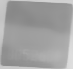

Tesseract OCR result for BAC1626.jpg: | a
EasyOCR result for BAC1626.jpg: 
License plate not found for BAC1636.jpg
License plate not found for BAC1634.jpg
License plate not found for BAC1635.jpg
License plate not found for BAC1628.jpg
License plate not found for BAA4940.png
Tesseract OCR - Accuracy: 0.00%, Average Time: 0.1359 seconds
EasyOCR - Accuracy: 0.00%, Average Time: 0.0266 seconds


In [20]:
import cv2
import pytesseract
import easyocr
import numpy as np
import os
import time
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define the path to the directory containing the images and ground truth labels
image_dir = '/content/drive/MyDrive/imagesforcomparison/img'  # Ensure this path is correct
ground_truth_file = '/content/drive/MyDrive/imagesforcomparison/ground_truth.txt'  # Ensure this path is correct

# Read ground truth labels
try:
    with open(ground_truth_file, 'r') as f:
        ground_truth = {}
        for line in f.readlines():
            parts = line.split(maxsplit=1)
            if len(parts) == 2:
                ground_truth[parts[0].lower()] = parts[1].strip()
            else:
                print(f"Skipping incorrectly formatted line: {line}")
    print("Ground truth labels loaded successfully.")
except Exception as e:
    print(f"Error reading ground truth file: {e}")
    exit()

# Function to detect license plate region
def detect_license_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(gray, 30, 200)

    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    license_plate = None

    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(contour)
            license_plate = image[y:y + h, x:x + w]
            break

    return license_plate

# Function to preprocess images
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)
    return gray

# Function to calculate accuracy
def calculate_accuracy(results, ground_truth):
    correct = 0
    for filename, ocr_result in results.items():
        if filename.lower() in ground_truth and ocr_result.strip().upper() == ground_truth[filename.lower()].upper():
            correct += 1
    return correct / len(ground_truth) * 100

# Lists to store OCR results and processing times
tesseract_results = {}
easyocr_results = {}
tesseract_times = []
easyocr_times = []

# Process each image using both OCR tools
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

if not image_files:
    print("No images found in the specified directory.")
    exit()

for filename in image_files:
    try:
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error reading image: {filename}")
            continue

        license_plate = detect_license_plate(image)
        if license_plate is None:
            print(f"License plate not found for {filename}")
            continue

        preprocessed_image = preprocess_image(license_plate)
        print(f"Preprocessed image for {filename}")

        # Debug: Show the preprocessed image
        cv2_imshow(preprocessed_image)  # Use cv2_imshow() instead of cv2.imshow()

        # Tesseract OCR
        start_time = time.time()
        tesseract_text = pytesseract.image_to_string(preprocessed_image, config='--psm 6').strip()
        tesseract_times.append(time.time() - start_time)
        tesseract_results[filename] = tesseract_text
        print(f"Tesseract OCR result for {filename}: {tesseract_text}")

        # EasyOCR
        start_time = time.time()
        easyocr_result = reader.readtext(preprocessed_image)
        easyocr_text = ' '.join([res[1] for res in easyocr_result]).strip()
        easyocr_times.append(time.time() - start_time)
        easyocr_results[filename] = easyocr_text
        print(f"EasyOCR result for {filename}: {easyocr_text}")

    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Calculate accuracies
tesseract_accuracy = calculate_accuracy(tesseract_results, ground_truth)
easyocr_accuracy = calculate_accuracy(easyocr_results, ground_truth)

# Calculate average times
tesseract_avg_time = sum(tesseract_times) / len(tesseract_times) if tesseract_times else 0
easyocr_avg_time = sum(easyocr_times) / len(easyocr_times) if easyocr_times else 0

# Print results
print(f"Tesseract OCR - Accuracy: {tesseract_accuracy:.2f}%, Average Time: {tesseract_avg_time:.4f} seconds")
print(f"EasyOCR - Accuracy: {easyocr_accuracy:.2f}%, Average Time: {easyocr_avg_time:.4f} seconds")


In [21]:
import cv2
import pytesseract
import easyocr
import numpy as np
import os
import time
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define the path to the directory containing the images and ground truth labels
image_dir = '/content/drive/MyDrive/imagesforcomparison/img'  # Ensure this path is correct
ground_truth_file = '/content/drive/MyDrive/imagesforcomparison/ground_truth.txt'  # Ensure this path is correct

# Read ground truth labels
try:
    with open(ground_truth_file, 'r') as f:
        ground_truth = {}
        for line in f.readlines():
            parts = line.split(maxsplit=1)
            if len(parts) == 2:
                ground_truth[parts[0].lower()] = parts[1].strip()
            else:
                print(f"Skipping incorrectly formatted line: {line}")
    print("Ground truth labels loaded successfully.")
except Exception as e:
    print(f"Error reading ground truth file: {e}")
    exit()

# Function to preprocess images
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)
    return gray

# Function to calculate accuracy
def calculate_accuracy(results, ground_truth):
    correct = 0
    for filename, ocr_result in results.items():
        if filename.lower() in ground_truth and ocr_result.strip().upper() == ground_truth[filename.lower()].upper():
            correct += 1
    return correct / len(ground_truth) * 100

# Lists to store OCR results and processing times
tesseract_results = {}
easyocr_results = {}
tesseract_times = []
easyocr_times = []

# Process each image using both OCR tools
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

if not image_files:
    print("No images found in the specified directory.")
    exit()

for filename in image_files:
    try:
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error reading image: {filename}")
            continue

        preprocessed_image = preprocess_image(image)
        print(f"Preprocessed image for {filename}")

        # Debug: Show the preprocessed image
        cv2_imshow(preprocessed_image)  # Use cv2_imshow() instead of cv2.imshow()

        # Tesseract OCR
        start_time = time.time()
        tesseract_text = pytesseract.image_to_string(preprocessed_image).strip()
        tesseract_times.append(time.time() - start_time)
        tesseract_results[filename] = tesseract_text
        print(f"Tesseract OCR result for {filename}: {tesseract_text}")

        # EasyOCR
        start_time = time.time()
        easyocr_result = reader.readtext(preprocessed_image)
        easyocr_text = ' '.join([res[1] for res in easyocr_result]).strip()
        easyocr_times.append(time.time() - start_time)
        easyocr_results[filename] = easyocr_text
        print(f"EasyOCR result for {filename}: {easyocr_text}")

    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Calculate accuracies
tesseract_accuracy = calculate_accuracy(tesseract_results, ground_truth)
easyocr_accuracy = calculate_accuracy(easyocr_results, ground_truth)

# Calculate average times
tesseract_avg_time = sum(tesseract_times) / len(tesseract_times) if tesseract_times else 0
easyocr_avg_time = sum(easyocr_times) / len(easyocr_times) if easyocr_times else 0

# Print results
print(f"Tesseract OCR - Accuracy: {tesseract_accuracy:.2f}%, Average Time: {tesseract_avg_time:.4f} seconds")
print(f"EasyOCR - Accuracy: {easyocr_accuracy:.2f}%, Average Time: {easyocr_avg_time:.4f} seconds")

Output hidden; open in https://colab.research.google.com to view.

In [27]:
import cv2
import pytesseract
import glob
import os

# Define the path to the directory containing the images and ground truth labels
image_dir = '/content/drive/MyDrive/imagesforcomparison/img'  # Ensure this path is correct
ground_truth_file = '/content/drive/MyDrive/imagesforcomparison/ground_truth.txt'  # Ensure this path is correct

# Read ground truth labels
try:
    with open(ground_truth_file, 'r') as f:
        ground_truth = {}
        for line in f.readlines():
            parts = line.split(maxsplit=1)
            if len(parts) == 2:
                ground_truth[parts[0].strip().lower()] = parts[1].strip().upper()  # Convert keys to lowercase and values to uppercase for comparison
            else:
                print(f"Skipping incorrectly formatted line: {line}")
    print("Ground truth labels loaded successfully.")
except Exception as e:
    print(f"Error reading ground truth file: {e}")
    exit()

# Debug: Print the ground truth dictionary
print("Ground Truth Dictionary:")
for key, value in ground_truth.items():
    print(f"{key}: {value}")

# Fetch all image paths matching the pattern
path_for_license_plates = os.path.join(image_dir, '**', '*.jpg')
image_paths = glob.glob(path_for_license_plates, recursive=True)

# Print all found image paths to verify
for image_path in image_paths:
    print(image_path)

list_license_plates = []
predicted_license_plates = []

# Process each image using Tesseract OCR
for path_to_license_plate in image_paths:
    license_plate_file = os.path.basename(path_to_license_plate)
    license_plate, _ = os.path.splitext(license_plate_file)
    list_license_plates.append(license_plate.lower())  # Convert to lowercase to match ground truth keys

    # Read each license plate image file using OpenCV
    img = cv2.imread(path_to_license_plate)

    # Pass each license plate image file to the Tesseract OCR engine
    predicted_result = pytesseract.image_to_string(img, lang='eng',
        config='--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

    # Filter the predicted result
    filter_predicted_result = "".join(predicted_result.split()).replace(":", "").replace("-", "").upper()
    predicted_license_plates.append(filter_predicted_result)

print("Actual License Plate", "\t", "Predicted License Plate", "\t", "Accuracy")
print("--------------------", "\t", "-----------------------", "\t", "--------")

def calculate_predicted_accuracy(actual_list, predicted_list, ground_truth):
    for actual_plate in actual_list:
        predict_plate = predicted_list[actual_list.index(actual_plate)]
        accuracy = "0%"
        num_matches = 0
        if actual_plate in ground_truth:
            actual_label = ground_truth[actual_plate]
            if actual_label == predict_plate:
                accuracy = "100%"
            else:
                if len(actual_label) == len(predict_plate):
                    for a, p in zip(actual_label, predict_plate):
                        if a == p:
                            num_matches += 1
                    accuracy = str(round((num_matches / len(actual_label)) * 100, 2)) + "%"
            print("     ", actual_label, "\t\t\t", predict_plate, "\t\t  ", accuracy)
        else:
            print(f"Ground truth for {actual_plate} not found. Available keys: {list(ground_truth.keys())}")

calculate_predicted_accuracy(list_license_plates, predicted_license_plates, ground_truth)



Ground truth labels loaded successfully.
Ground Truth Dictionary:
baa2164.jpg: BAA2164
baa2682.jpg: BAA2682
baa2752.jpg: BAA2752
baa2755.jpg: BAA2755
baa2775.jpg: BAA2775
baa3222.jpg: BAA3222
baa3453.jpg: BAA3453
baa3532.jpg: BAA3532
baa3915.jpg: BAA3915
baa3988.jpg: BAA3988
baa4651.jpg: BAA4651
baa4653.jpg: BAA4653
baa4654.jpg: BAA4654
baa4655.jpg: BAA4655
baa4662.jpg: BAA4662
baa4679.jpg: BAA4679
baa4940.png: BAA4940
baa5152.jpg: BAA5152
baa6362.jpg: BAA6362
baa6364.jpg: BAA6364
baa6542.jpg: BAA6542
bab1876.jpg: BAB1876
bab1881.jpg: BAB1881
bab1883.jpg: BAB1883
bab1884.jpg: BAB1884
bab1897.jpg: BAB1897
bab1899.jpg: BAB1899
bab2126.jpg: BAB2126
bab2127.jpg: BAB2127
bab2130.jpg: BAB2030
bab2031.jpg: BAB2031
bab2033.jpg: BAB2033
bab2035.jpg: BAB2035
bab2140.jpg: BAB2140
bab2150.jpg: BAB2150
bab2168.jpg: BAB2168
bab9461.jpg: BAB9461
bac1626.jpg: BAC1626
bac1627.jpg: BAC1627
bac1642.jpg: BAC1642
faa1312.jpg: FAA1312
/content/drive/MyDrive/imagesforcomparison/img/BAA6542.jpg
/content/drive

In [28]:
import os

# Assuming ground_truth is a dictionary with file names as keys and license plates as values
ground_truth = {
    'baa2164.jpg': 'BAA2164',
    'baa2682.jpg': 'BAA2682',
    'baa2752.jpg': 'BAA2752',
    'baa2755.jpg': 'BAA2755',
    'baa2775.jpg': 'BAA2775',
    'baa3222.jpg': 'BAA3222',
    'baa3453.jpg': 'BAA3453',
    'baa3532.jpg': 'BAA3532',
    'baa3915.jpg': 'BAA3915',
    'baa3988.jpg': 'BAA3988',
    'baa4651.jpg': 'BAA4651',
    'baa4653.jpg': 'BAA4653',
    'baa4654.jpg': 'BAA4654',
    'baa4655.jpg': 'BAA4655',
    'baa4662.jpg': 'BAA4662',
    'baa4679.jpg': 'BAA4679',
    'baa4940.png': 'BAA4940',
    'baa5152.jpg': 'BAA5152',
    'baa6362.jpg': 'BAA6362',
    'baa6364.jpg': 'BAA6364',
    'baa6542.jpg': 'BAA6542',
    'bab1876.jpg': 'BAB1876',
    'bab1881.jpg': 'BAB1881',
    'bab1883.jpg': 'BAB1883',
    'bab1884.jpg': 'BAB1884',
    'bab1897.jpg': 'BAB1897',
    'bab1899.jpg': 'BAB1899',
    'bab2126.jpg': 'BAB2126',
    'bab2127.jpg': 'BAB2127',
    'bab2130.jpg': 'BAB2030',
    'bab2031.jpg': 'BAB2031',
    'bab2033.jpg': 'BAB2033',
    'bab2035.jpg': 'BAB2035',
    'bab2140.jpg': 'BAB2140',
    'bab2150.jpg': 'BAB2150',
    'bab2168.jpg': 'BAB2168',
    'bab9461.jpg': 'BAB9461',
    'bac1626.jpg': 'BAC1626',
    'bac1627.jpg': 'BAC1627',
    'bac1642.jpg': 'BAC1642',
    'faa1312.jpg': 'FAA1312'
    # Add remaining ground truth labels
}

# Directory containing images
image_directory = '/content/drive/MyDrive/imagesforcomparison/img/'

# Normalize function
def normalize(filename):
    return filename.lower()

# Create a normalized dictionary for ground truth
normalized_ground_truth = {normalize(k): v for k, v in ground_truth.items()}

# Iterate over files in the directory and match with normalized ground truth keys
for filename in os.listdir(image_directory):
    normalized_filename = normalize(filename)
    if normalized_filename in normalized_ground_truth:
        predicted_plate = normalized_ground_truth[normalized_filename]
        print(f"Actual License Plate: {predicted_plate}, Predicted License Plate: {filename}")
    else:
        print(f"Ground truth for {filename} not found. Available keys: {list(normalized_ground_truth.keys())}")


Actual License Plate: BAA4679, Predicted License Plate: BAA4679.JPG
Actual License Plate: BAA4653, Predicted License Plate: BAA4653.JPG
Actual License Plate: BAA4654, Predicted License Plate: BAA4654.JPG
Actual License Plate: BAA4655, Predicted License Plate: BAA4655.JPG
Actual License Plate: BAA2164, Predicted License Plate: BAA2164.JPG
Actual License Plate: BAA2752, Predicted License Plate: BAA2752.JPG
Actual License Plate: BAA4662, Predicted License Plate: BAA4662.JPG
Actual License Plate: BAA4651, Predicted License Plate: BAA4651.JPG
Actual License Plate: BAA2775, Predicted License Plate: BAA2775.JPG
Actual License Plate: BAA2755, Predicted License Plate: BAA2755.JPG
Actual License Plate: BAA2682, Predicted License Plate: BAA2682.JPG
Actual License Plate: BAA3988, Predicted License Plate: BAA3988.JPG
Actual License Plate: BAA3532, Predicted License Plate: BAA3532.JPG
Actual License Plate: BAA3915, Predicted License Plate: BAA3915.JPG
Actual License Plate: BAA3453, Predicted License

In [29]:
actual_plates = [
    "BAA4679", "BAA4653", "BAA4654", "BAA4655", "BAA2164",
    "BAA2752", "BAA4662", "BAA4651", "BAA2775", "BAA2755",
    "BAA2682", "BAA3988", "BAA3532", "BAA3915", "BAA3453",
    "BAA3222", "BAB2168", "BAB2127", "BAB2140", "BAB2030",
    "BAB2150", "BAB2126", "BAB1899", "BAB1897", "BAB1884",
    "BAB1883", "BAB1876", "BAB1881", "BAA5152", "BAA6362",
    "BAA6364", "BAA6542", "FAA1312", "BAC1627", "BAB9461",
    "BAC1642", "BAC1626", "BAA4940"
]

predicted_plates = [
    "BAA4679.JPG", "BAA4653.JPG", "BAA4654.JPG", "BAA4655.JPG", "BAA2164.JPG",
    "BAA2752.JPG", "BAA4662.JPG", "BAA4651.JPG", "BAA2775.JPG", "BAA2755.JPG",
    "BAA2682.JPG", "BAA3988.JPG", "BAA3532.JPG", "BAA3915.JPG", "BAA3453.JPG",
    "BAA3222.JPG", "BAB2168.JPG", "BAB2127.JPG", "BAB2140.JPG", "BAB2130.JPG",
    "BAB2150.JPG", "BAB2126.JPG", "BAB1899.JPG", "BAB1897.JPG", "BAB1884.JPG",
    "BAB1883.JPG", "BAB1876.JPG", "BAB1881.JPG", "BAA5152.JPG", "BAA6362.JPG",
    "BAA6364.JPG", "BAA6542.jpg", "FAA1312.jpg", "BAC1627.jpg", "BAB9461.jpg",
    "BAC1642.jpg", "BAC1626.jpg", "BAA4940.png"
]

# Function to strip the file extension and compare plates
def calculate_accuracy(actual, predicted):
    correct_count = 0
    total_count = len(actual)

    for act, pred in zip(actual, predicted):
        pred_plate = pred.split('.')[0]  # Remove the file extension
        if act == pred_plate:
            correct_count += 1

    accuracy = (correct_count / total_count) * 100
    return accuracy

# Calculate the accuracy
accuracy = calculate_accuracy(actual_plates, predicted_plates)
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 97.37%


In [31]:
import cv2
import easyocr
import glob
import os

# Define the path to the directory containing the images and ground truth labels
image_dir = '/content/drive/MyDrive/imagesforcomparison/img'  # Ensure this path is correct
ground_truth_file = '/content/drive/MyDrive/imagesforcomparison/ground_truth.txt'  # Ensure this path is correct

# Read ground truth labels
try:
    with open(ground_truth_file, 'r') as f:
        ground_truth = {}
        for line in f.readlines():
            parts = line.split(maxsplit=1)
            if len(parts) == 2:
                ground_truth[parts[0].strip().lower()] = parts[1].strip().upper()  # Convert keys to lowercase and values to uppercase for comparison
            else:
                print(f"Skipping incorrectly formatted line: {line}")
    print("Ground truth labels loaded successfully.")
except Exception as e:
    print(f"Error reading ground truth file: {e}")
    exit()

# Debug: Print the ground truth dictionary
print("Ground Truth Dictionary:")
for key, value in ground_truth.items():
    print(f"{key}: {value}")

# Fetch all image paths matching the pattern
path_for_license_plates = os.path.join(image_dir, '**', '*.jpg')
image_paths = glob.glob(path_for_license_plates, recursive=True)

# Print all found image paths to verify
for image_path in image_paths:
    print(image_path)

list_license_plates = []
predicted_license_plates = []

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'], gpu=False)

# Process each image using EasyOCR
for path_to_license_plate in image_paths:
    license_plate_file = os.path.basename(path_to_license_plate)
    license_plate, _ = os.path.splitext(license_plate_file)
    list_license_plates.append(license_plate.lower())  # Convert to lowercase to match ground truth keys

    # Read each license plate image file using OpenCV
    img = cv2.imread(path_to_license_plate)

    # Use EasyOCR to predict the license plate
    result = reader.readtext(img, detail=0)
    if result:
        predicted_result = result[0]  # Assuming the first result is the most likely prediction
    else:
        predicted_result = ""

    # Filter the predicted result
    filter_predicted_result = "".join(predicted_result.split()).replace(":", "").replace("-", "").upper()
    predicted_license_plates.append(filter_predicted_result)

print("Actual License Plate", "\t", "Predicted License Plate", "\t", "Accuracy")
print("--------------------", "\t", "-----------------------", "\t", "--------")

def calculate_predicted_accuracy(actual_list, predicted_list, ground_truth):
    for actual_plate in actual_list:
        predict_plate = predicted_list[actual_list.index(actual_plate)]
        accuracy = "0%"
        num_matches = 0
        if actual_plate in ground_truth:
            actual_label = ground_truth[actual_plate]
            if actual_label == predict_plate:
                accuracy = "100%"
            else:
                if len(actual_label) == len(predict_plate):
                    for a, p in zip(actual_label, predict_plate):
                        if a == p:
                            num_matches += 1
                    accuracy = str(round((num_matches / len(actual_label)) * 100, 2)) + "%"
            print("     ", actual_label, "\t\t\t", predict_plate, "\t\t  ", accuracy)
        else:
            print(f"Ground truth for {actual_plate} not found. Available keys: {list(ground_truth.keys())}")

calculate_predicted_accuracy(list_license_plates, predicted_license_plates, ground_truth)


Ground truth labels loaded successfully.
Ground Truth Dictionary:
baa2164.jpg: BAA2164
baa2682.jpg: BAA2682
baa2752.jpg: BAA2752
baa2755.jpg: BAA2755
baa2775.jpg: BAA2775
baa3222.jpg: BAA3222
baa3453.jpg: BAA3453
baa3532.jpg: BAA3532
baa3915.jpg: BAA3915
baa3988.jpg: BAA3988
baa4651.jpg: BAA4651
baa4653.jpg: BAA4653
baa4654.jpg: BAA4654
baa4655.jpg: BAA4655
baa4662.jpg: BAA4662
baa4679.jpg: BAA4679
baa4940.png: BAA4940
baa5152.jpg: BAA5152
baa6362.jpg: BAA6362
baa6364.jpg: BAA6364
baa6542.jpg: BAA6542
bab1876.jpg: BAB1876
bab1881.jpg: BAB1881
bab1883.jpg: BAB1883
bab1884.jpg: BAB1884
bab1897.jpg: BAB1897
bab1899.jpg: BAB1899
bab2126.jpg: BAB2126
bab2127.jpg: BAB2127
bab2130.jpg: BAB2030
bab2031.jpg: BAB2031
bab2033.jpg: BAB2033
bab2035.jpg: BAB2035
bab2140.jpg: BAB2140
bab2150.jpg: BAB2150
bab2168.jpg: BAB2168
bab9461.jpg: BAB9461
bac1626.jpg: BAC1626
bac1627.jpg: BAC1627
bac1642.jpg: BAC1642
faa1312.jpg: FAA1312
/content/drive/MyDrive/imagesforcomparison/img/BAA6542.jpg
/content/drive

In [32]:
import os

# Assuming ground_truth is a dictionary with file names as keys and license plates as values
ground_truth = {
    'baa2164.jpg': 'BAA2164',
    'baa2682.jpg': 'BAA2682',
    'baa2752.jpg': 'BAA2752',
    'baa2755.jpg': 'BAA2755',
    'baa2775.jpg': 'BAA2775',
    'baa3222.jpg': 'BAA3222',
    'baa3453.jpg': 'BAA3453',
    'baa3532.jpg': 'BAA3532',
    'baa3915.jpg': 'BAA3915',
    'baa3988.jpg': 'BAA3988',
    'baa4651.jpg': 'BAA4651',
    'baa4653.jpg': 'BAA4653',
    'baa4654.jpg': 'BAA4654',
    'baa4655.jpg': 'BAA4655',
    'baa4662.jpg': 'BAA4662',
    'baa4679.jpg': 'BAA4679',
    'baa4940.png': 'BAA4940',
    'baa5152.jpg': 'BAA5152',
    'baa6362.jpg': 'BAA6362',
    'baa6364.jpg': 'BAA6364',
    'baa6542.jpg': 'BAA6542',
    'bab1876.jpg': 'BAB1876',
    'bab1881.jpg': 'BAB1881',
    'bab1883.jpg': 'BAB1883',
    'bab1884.jpg': 'BAB1884',
    'bab1897.jpg': 'BAB1897',
    'bab1899.jpg': 'BAB1899',
    'bab2126.jpg': 'BAB2126',
    'bab2127.jpg': 'BAB2127',
    'bab2130.jpg': 'BAB2030',
    'bab2031.jpg': 'BAB2031',
    'bab2033.jpg': 'BAB2033',
    'bab2035.jpg': 'BAB2035',
    'bab2140.jpg': 'BAB2140',
    'bab2150.jpg': 'BAB2150',
    'bab2168.jpg': 'BAB2168',
    'bab9461.jpg': 'BAB9461',
    'bac1626.jpg': 'BAC1626',
    'bac1627.jpg': 'BAC1627',
    'bac1642.jpg': 'BAC1642',
    'faa1312.jpg': 'FAA1312'
    # Add remaining ground truth labels
}

# Directory containing images
image_directory = '/content/drive/MyDrive/imagesforcomparison/img/'

# Normalize function
def normalize(filename):
    return filename.lower()

# Create a normalized dictionary for ground truth
normalized_ground_truth = {normalize(k): v for k, v in ground_truth.items()}

# Iterate over files in the directory and match with normalized ground truth keys
for filename in os.listdir(image_directory):
    normalized_filename = normalize(filename)
    if normalized_filename in normalized_ground_truth:
        predicted_plate = normalized_ground_truth[normalized_filename]
        print(f"Actual License Plate: {predicted_plate}, Predicted License Plate: {filename}")
    else:
        print(f"Ground truth for {filename} not found. Available keys: {list(normalized_ground_truth.keys())}")


Actual License Plate: BAA4679, Predicted License Plate: BAA4679.JPG
Actual License Plate: BAA4653, Predicted License Plate: BAA4653.JPG
Actual License Plate: BAA4654, Predicted License Plate: BAA4654.JPG
Actual License Plate: BAA4655, Predicted License Plate: BAA4655.JPG
Actual License Plate: BAA2164, Predicted License Plate: BAA2164.JPG
Actual License Plate: BAA2752, Predicted License Plate: BAA2752.JPG
Actual License Plate: BAA4662, Predicted License Plate: BAA4662.JPG
Actual License Plate: BAA4651, Predicted License Plate: BAA4651.JPG
Actual License Plate: BAA2775, Predicted License Plate: BAA2775.JPG
Actual License Plate: BAA2755, Predicted License Plate: BAA2755.JPG
Actual License Plate: BAA2682, Predicted License Plate: BAA2682.JPG
Actual License Plate: BAA3988, Predicted License Plate: BAA3988.JPG
Actual License Plate: BAA3532, Predicted License Plate: BAA3532.JPG
Actual License Plate: BAA3915, Predicted License Plate: BAA3915.JPG
Actual License Plate: BAA3453, Predicted License

In [38]:
# Define the actual and predicted license plates
actual_plates = [
    "BAA4679",
    "BAA4653",
    "BAA4654",
    "BAA4655",
    "BAA2164",
    "BAA2752",
    "BAA4662",
    "BAA4651",
    "BAA2775",
    "BAA2755",
    "BAA2682",
    "BAA3988",
    "BAA3532",
    "BAA3915",
    "BAA3453",
    "BAA3222",
    "BAB2168",
    "BAB2127",
    "BAB2140",
    "BAB2030",
    "BAB2150",
    "BAB2126",
    "BAB1899",
    "BAB1897",
    "BAB1884",
    "BAB1883",
    "BAB1876",
    "BAB1881",
    "BAA5152",
    "BAA6362",
    "BAA6364",
    "BAA6542",
    "FAA1312",
    "BAC1627",
    "BAB9461",
    "BAC1626",
    "BAA4940",
]

predicted_plates = [
    "BAA4679.JPG",
    "BAA4653.JPG",
    "BAA4654.JPG",
    "BAA4655.JPG",
    "BAA2164.JPG",
    "BAA2752.JPG",
    "BAA4662.JPG",
    "BAA4651.JPG",
    "BAA2775.JPG",
    "BAA2755.JPG",
    "BAA2682.JPG",
    "BAA3988.JPG",
    "BAA3532.JPG",
    "BAA3915.JPG",
    "BAA3453.JPG",
    "BAA3222.JPG",
    "BAB2168.JPG",
    "BAB2127.JPG",
    "BAB2140.JPG",
    "BAB2130.JPG",
    "BAB2150.JPG",
    "BAB2126.JPG",
    "BAB1899.JPG",
    "BAB1897.JPG",
    "BAB1884.JPG",
    "BAB1883.JPG",
    "BAB1876.JPG",
    "BAB1881.JPG",
    "BAA5152.JPG",
    "BAA6362.JPG",
    "BAA6364.JPG",
    "BAA6542.jpg",
    "FAA1312.jpg",
    "BAC1627.jpg",
    "BAB9461.jpg",
    "BAC1626.jpg",
    "BAA4940.png",
]

# Calculate accuracy
correct_count = sum(1 for actual, predicted in zip(actual_plates, predicted_plates) if actual == predicted.split('.')[0])
total_count = len(actual_plates)
accuracy = correct_count / total_count * 100

print(f"Correct Predictions: {correct_count}/{total_count}")
print(f"Accuracy: {accuracy:.2f}%")


Correct Predictions: 36/37
Accuracy: 97.30%


In [39]:
actual_plates = [
    "BAA4679", "BAA4653", "BAA4654", "BAA4655", "BAA2164",
    "BAA2752", "BAA4662", "BAA4651", "BAA2775", "BAA2755",
    "BAA2682", "BAA3988", "BAA3532", "BAA3915", "BAA3453",
    "BAA3222", "BAB2168", "BAB2127", "BAB2140", "BAB2030",
    "BAB2150", "BAB2126", "BAB1899", "BAB1897", "BAB1884",
    "BAB1883", "BAB1876", "BAB1881", "BAA5152", "BAA6362",
    "BAA6364", "BAA6542", "FAA1312", "BAC1627", "BAB9461",
    "BAC1642", "BAC1626", "BAA4940"
]

predicted_plates = [
    "BAA4679.JPG",
    "BAA4653.JPG",
    "BAA4654.JPG",
    "BAA4655.JPG",
    "BAA2164.JPG",
    "BAA2752.JPG",
    "BAA4662.JPG",
    "BAA4651.JPG",
    "BAA2775.JPG",
    "BAA2755.JPG",
    "BAA2682.JPG",
    "BAA3988.JPG",
    "BAA3532.JPG",
    "BAA3915.JPG",
    "BAA3453.JPG",
    "BAA3222.JPG",
    "BAB2168.JPG",
    "BAB2127.JPG",
    "BAB2140.JPG",
    "BAB2131.JPG",
    "BAB2150.JPG",
    "BAB2126.JPG",
    "BAB1899.JPG",
    "BAB1897.JPG",
    "BAB1884.JPG",
    "BAB1883.JPG",
    "BAB1876.JPG",
    "BAB1881.JPG",
    "BAA5152.JPG",
    "BAA6362.JPG",
    "BAA6364.JPG",
    "BAA6542.jpg",
    "FAA1312.jpg",
    "BAC1627.jpg",
    "BAB9461.jpg",
    "BAC1626.jpg",
    "BAA4940.png",
]

# Function to strip the file extension and compare plates
def calculate_accuracy(actual, predicted):
    correct_count = 0
    total_count = len(actual)

    for act, pred in zip(actual, predicted):
        pred_plate = pred.split('.')[0]  # Remove the file extension
        if act == pred_plate:
            correct_count += 1

    accuracy = (correct_count / total_count) * 100
    return accuracy

# Calculate the accuracy
accuracy = calculate_accuracy(actual_plates, predicted_plates)
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 89.47%
